<a href="https://colab.research.google.com/github/NIKITA0509-I/LOGISTIC-REGRESSION/blob/main/TRDEMILL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/treadmil-users.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.tail()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [ ]:
df.shape

(180, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df['Product'].nunique()         #how many unique values

3

In [ ]:
df['Product'].unique()         #name of unique values

array(['TM195', 'TM498', 'TM798'], dtype=object)

In [ ]:
df.groupby('Product')['Gender'].value_counts()

Product  Gender
TM195    Female    40
         Male      40
TM498    Male      31
         Female    29
TM798    Male      33
         Female     7
Name: Gender, dtype: int64

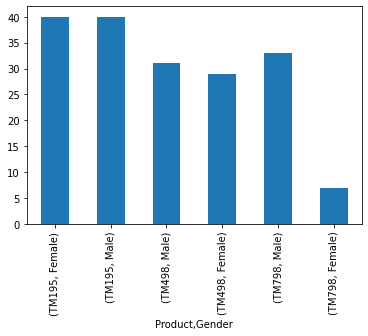

In [ ]:
df.groupby('Product')['Gender'].value_counts().plot(kind='bar')

In [ ]:
df['Gender'].value_counts()     

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [ ]:
max(df['Income'])

104581

In [ ]:
min(df['Income'])

29562

In [ ]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [ ]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [ ]:
#to check all unique values at time
cat_col=['Product','Gender','MaritalStatus','Fitness','Usage']
for i in cat_col:
  print(i)
  print('=========')
  print(df[i].value_counts())
  print('')

Product
TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

Gender
Male      104
Female     76
Name: Gender, dtype: int64

MaritalStatus
Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

Fitness
3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64



In [ ]:
#how many times they run a week
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [ ]:
#sorting of values
a=df['Miles'].unique()
a.sort()
a

array([ 21,  38,  42,  47,  53,  56,  64,  66,  74,  75,  80,  85,  94,
        95, 100, 103, 106, 112, 113, 120, 127, 132, 140, 141, 150, 160,
       169, 170, 180, 188, 200, 212, 240, 260, 280, 300, 360])

In [ ]:
df['Miles'].value_counts(sort=True)

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

In [ ]:
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
#to check duplicate values(rows and columsns)
df.duplicated().sum()

0

In [ ]:
cat_col=['Product','Gender','MaritalStatus','Education','Fitness','Usage']

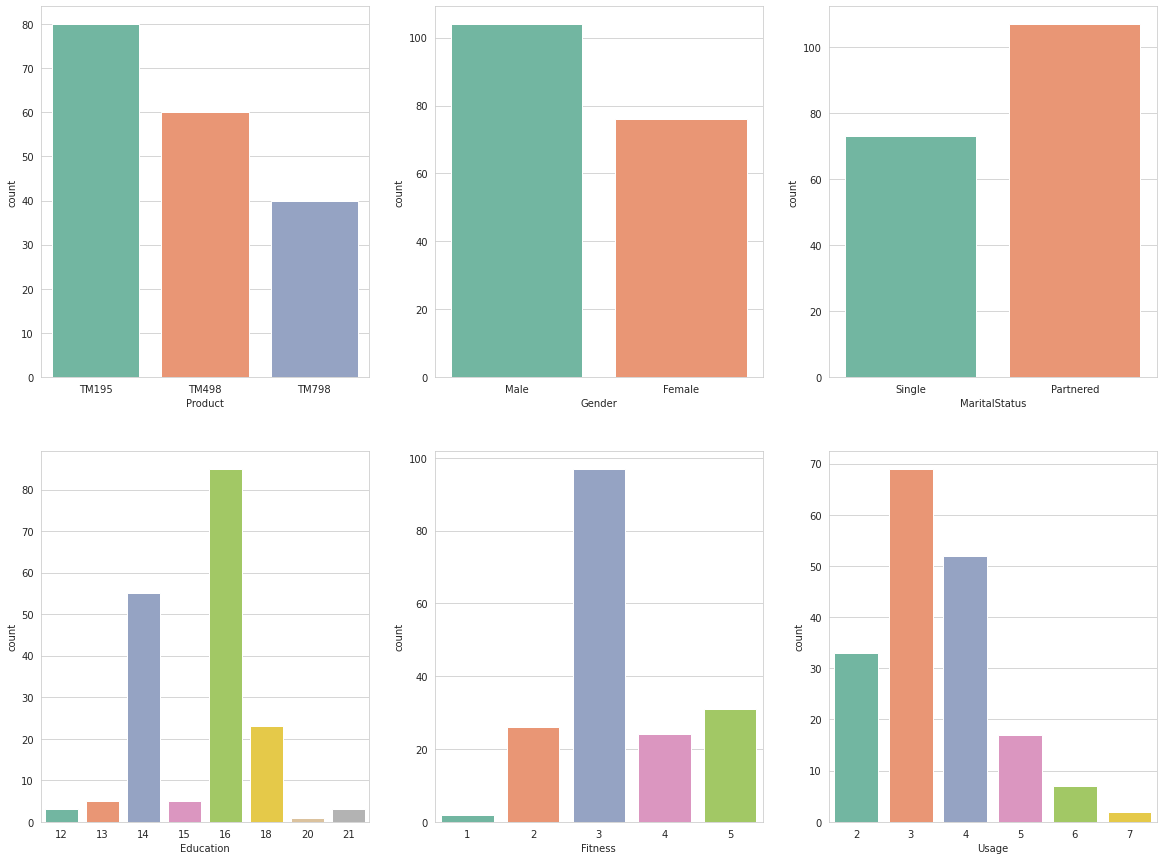

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('Set2')
plt.figure(figsize=(20,15))
for i,col in enumerate(cat_col):
  plt.subplot(2,3,i+1)
  sns.countplot(x=col,data=df)



In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
from logging import warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
num_col=['Miles','Fitness','Usage']

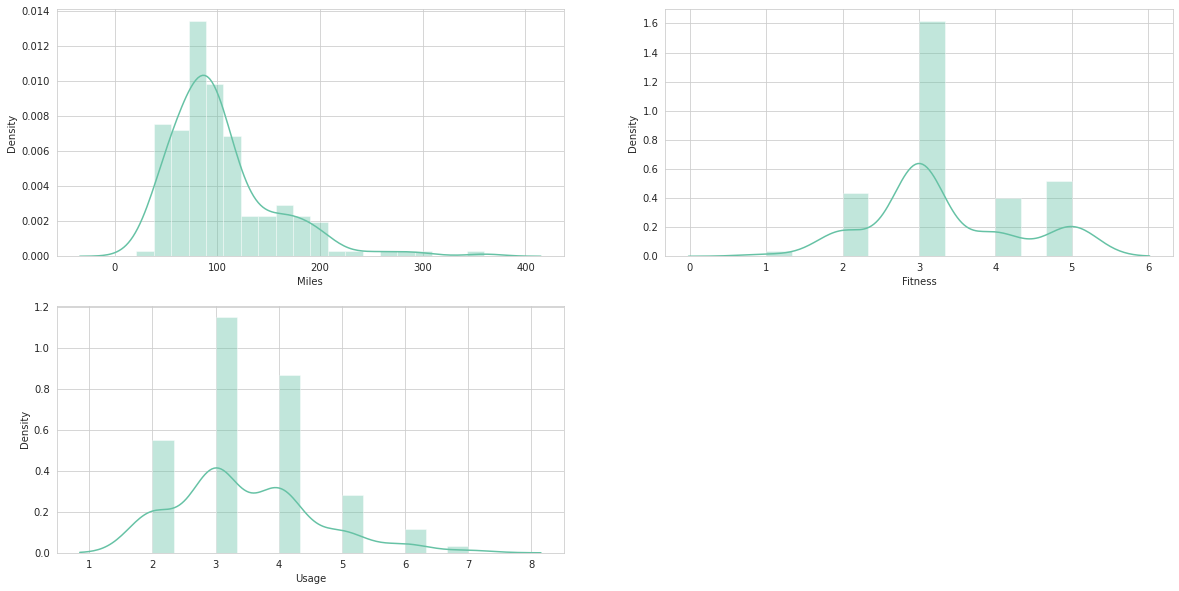

In [ ]:
plt.figure(figsize=(20,10))
for indx,col in enumerate(num_col):
  plt.subplot(2,2,indx+1)
  sns.distplot(df[col])

In [ ]:
df['Product'].value_counts(normalize=True)

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64

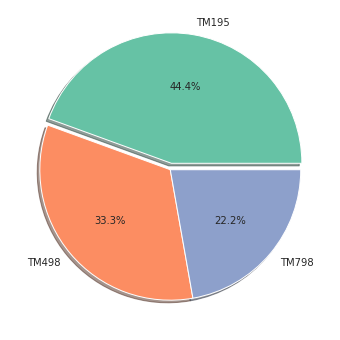

In [ ]:
plt.figure(figsize=(10,6))
explode=(0.05,0,0)
_=plt.pie(df['Product'].value_counts(),explode,labels=list(df['Product'].unique()),autopct='%0.1f%%',shadow=True)

BIVARIANT ANALYSIS

In [ ]:
new_col=['Gender','MaritalStatus']

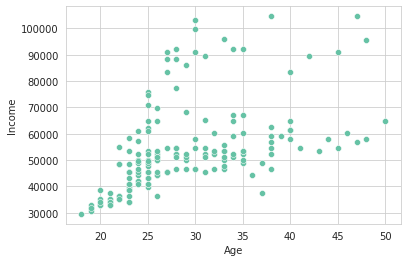

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Income'])

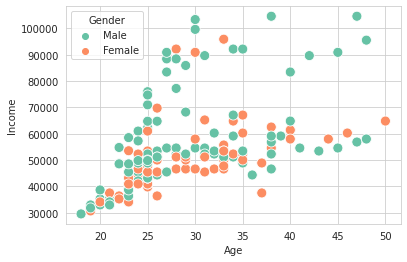

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Income'],hue='Gender',s=100,data=df)

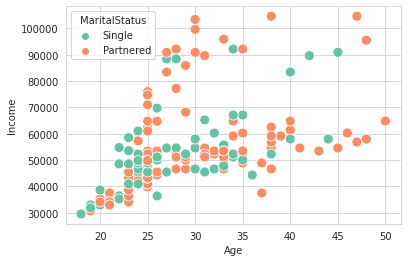

In [ ]:
sns.scatterplot(x=df['Age'],y=df['Income'],hue='MaritalStatus',s=100,data=df) 

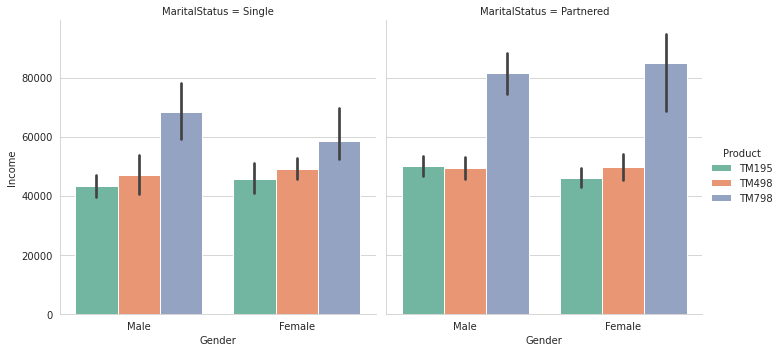

In [ ]:
sns.catplot(x='Gender',y='Income',hue='Product',col='MaritalStatus',data=df,kind='bar')

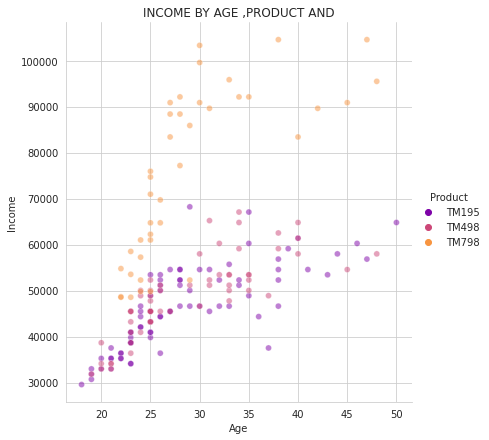

In [ ]:
sns.relplot(x="Age", 
            y="Income", 
            hue="Product",
            sizes=(40, 400), 
            alpha=.5, 
            palette="plasma",
            height=6, 
            data=df).set(title='INCOME BY AGE ,PRODUCT AND')